# Data Ingestion

We begin by installing necessary libraries and uploading our dataset. The dataset used in this project contains historical crop yield records along with environmental and soil-related features.

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving crop_yield_dataset.csv to crop_yield_dataset.csv


In [ ]:
!pip install pandas scikit-learn matplotlib seaborn xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


# Crop Yield Dataset (2014–2023)

<details>
<summary><strong>🌾 Dataset Overview</strong></summary>

This dataset provides a **daily, synthetic representation of crop yield and related environmental factors** over a 10-year period (2014–2023). It captures a rich variety of features that influence agricultural productivity. Designed for **machine learning, time-series analysis, and agronomic research**, this dataset balances domain realism with synthetic control.

</details>

<details>
<summary><strong>📌 Features Description</strong></summary>

| Feature        | Type         | Description |
|----------------|--------------|-------------|
| `Date`         | DateTime     | Daily observations from 2014-01-01 to 2023-12-31. Enables trend and seasonal analysis. |
| `Crop_Type`    | Categorical  | Crop being cultivated. Includes: Wheat, Corn, Rice, Barley, Soybean, Cotton, Sugarcane, Tomato, Potato, Sunflower. |
| `Soil_Type`    | Categorical  | Soil classification: Sandy, Clay, Loamy, Peaty, Saline. Influences nutrient behavior and yield potential. |
| `Soil_pH`      | Float        | Acidity/alkalinity of soil. Ranges by soil type:<br>• Sandy: 6.0–7.5<br>• Clay: 5.5–7.0<br>• Loamy: 6.0–7.0<br>• Peaty: 4.5–6.5<br>• Saline: 7.5–8.5 |
| `Temperature`  | Float (°C)   | Daily average. Varies seasonally: Winter ~15°C, Spring ~25°C, Summer ~35°C, Autumn ~20°C. |
| `Humidity`     | Float (%)    | Average daily humidity (30%–80%). Aligned with temperature fluctuations. |
| `Wind_Speed`   | Float (km/h) | Simulated using N(μ=10, σ=3). Influences pollination and moisture loss. |
| `N`, `P`, `K`  | Float (ppm)  | Nitrogen, Phosphorus, Potassium. Nutrient levels vary by crop and soil type. |
| `Crop_Yield`   | Float (t/ha) | Estimated daily yield per hectare. Computed from NPK, pH, temperature, and humidity. |
| `Soil_Quality` | Float (Index)| Index measuring soil health and fertility. Derived from NPK balance and pH alignment. |

</details>

<details>
<summary><strong>⚙️ Data Generation Process</strong></summary>

- **Soil pH Assignment:** Allocated using realistic pH ranges for each soil type.
- **NPK Simulation:** Adjusted per crop–soil interaction to reflect depletion/enrichment dynamics.
- **Climatic Factors:** Modeled based on season, simulating realistic daily temperature and humidity.
- **Crop Yield Estimation:** Simplified agronomic model integrating soil, nutrients, and climate variables.
- **Granularity:** Daily resolution across 10 years for high-fidelity time-series and statistical modeling.

</details>

<details>
<summary><strong>🔬 Potential Use Cases</strong></summary>

- 📈 **Predictive Modeling:** Build ML models for yield forecasting.
- 🧠 **Time-Series Forecasting:** Discover trends and seasonal effects.
- 🌱 **Soil & Crop Management:** Optimize inputs and growing strategies.
- 🌍 **Climate Impact Studies:** Analyze environmental stressors on agriculture.
- 📊 **Data Visualization:** Create interactive plots to uncover hidden patterns.

</details>

<details>
<summary><strong>⚠️ Dataset Limitations</strong></summary>

- 🧪 **Synthetic Nature:** Not based on real-world measurements; generated via simulation.
- 🎯 **Simplified Yield Model:** Excludes biological stresses (pests, diseases, extreme weather).
- 🌍 **Generalized Conditions:** Does not reflect regional soil or crop practice variations.

</details>

<details>
<summary><strong>✅ Conclusion</strong></summary>

This dataset offers a **robust, multi-dimensional synthetic simulation of crop yield determinants**, enabling a wide range of agronomic, climatic, and ML research. While it does not replicate all real-world complexities, it is **richly structured and informed by domain logic**, making it an excellent tool for experimentation and discovery.

</details>

In [ ]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('crop_yield_dataset.csv')

In [ ]:
df.head(10)

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667
5,2014-01-01,Cotton,Sandy,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000
6,2014-01-01,Sugarcane,Saline,8.00,13.533004,80.000000,9.910484,84.5,66.0,54.0,0.000000,17.041667
7,2014-01-01,Tomato,Clay,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667
8,2014-01-01,Potato,Peaty,5.50,18.895963,80.000000,6.696707,60.5,45.0,31.5,54.259727,22.833333
9,2014-01-01,Sunflower,Loamy,6.50,16.865595,80.000000,9.311649,70.0,66.0,55.0,68.119250,63.666667


In [ ]:
df.shape

(36520, 12)

In [ ]:
df.dtypes

,0
Date,object
Crop_Type,object
Soil_Type,object
Soil_pH,float64
Temperature,float64
Humidity,float64
Wind_Speed,float64
N,float64
P,float64
K,float64


In [ ]:
df.isnull().sum()

,0
Date,0
Crop_Type,0
Soil_Type,0
Soil_pH,0
Temperature,0
Humidity,0
Wind_Speed,0
N,0
P,0
K,0


In [ ]:
df.describe()

,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.816973,8.920519,6.767587,2.998310,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,8.000000,54.148911,80.000000,22.606078,91.000000,72.000000,60.00000,136.711982,74.333333


In [ ]:
#Check unique values in each column (for spotting typos or inconsistent categories)

print("Unique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")  # show first 10 unique values

Unique values in each column:
Date: ['2014-01-01' '2014-01-02' '2014-01-03' '2014-01-04' '2014-01-05'
 '2014-01-06' '2014-01-07' '2014-01-08' '2014-01-09' '2014-01-10']
Crop_Type: ['Wheat' 'Corn' 'Rice' 'Barley' 'Soybean' 'Cotton' 'Sugarcane' 'Tomato'
 'Potato' 'Sunflower']
Soil_Type: ['Peaty' 'Loamy' 'Sandy' 'Saline' 'Clay']
Soil_pH: [5.5  6.5  6.75 8.   6.25]
Temperature: [ 9.44059941 20.05257642 12.14309917 19.75184841 16.11039451 14.82673908
 13.53300427 18.32327171 18.89596317 16.86559457]
Humidity: [80.         79.94742358 79.98233551 70.28168292 77.98020631 78.84110812
 77.97397347 73.63327421 71.39915417 73.42670717]
Wind_Speed: [10.95670655  8.59157684  7.22775149  2.68268255  7.69607049 10.3666575
  9.91048429  8.19808393  6.69670673  9.31164864]
N: [60.5 84.  71.5 50.  49.5 55.  84.5 60.  70.  72. ]
P: [45.  66.  54.  40.  44.  55.  55.  60.  60.5 49.5]
K: [31.5 50.  38.5 30.  36.  54.  40.  55.  45.  60. ]
Crop_Yield: [  0.         104.87131033  58.93979634  32.97041272  29

# Data Preprocessing

## Cleaning

In [ ]:
# Dropping the 'Date' column as it is not useful in its current form

df = df.drop(['Date'], axis=1)

## Visualization

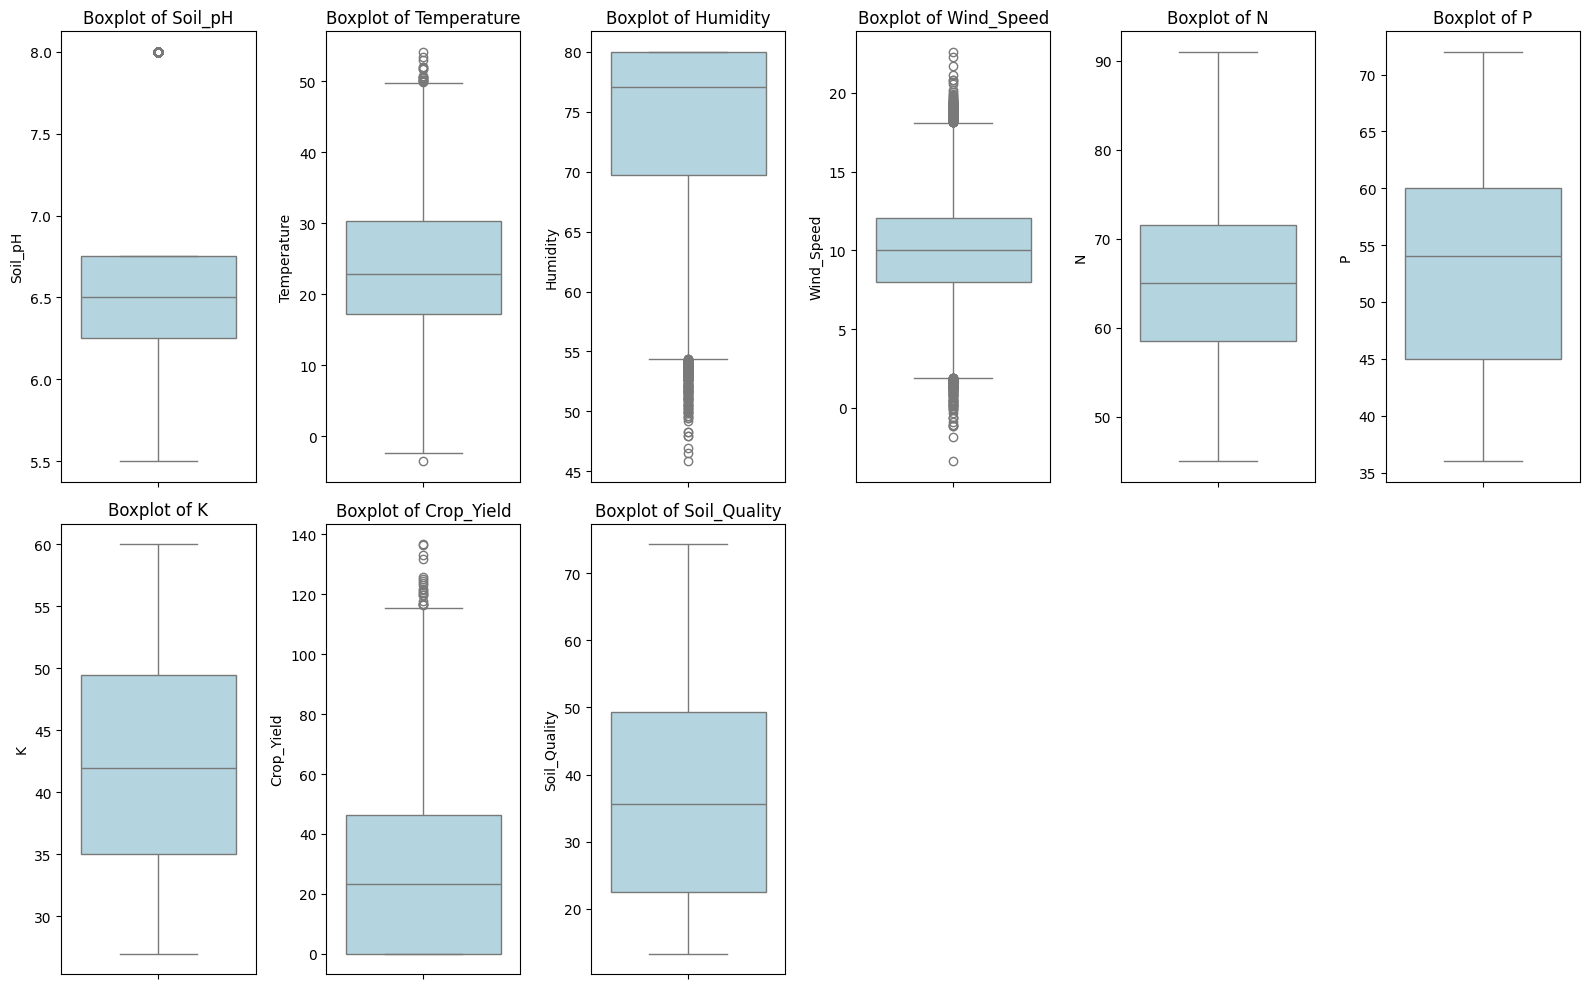

In [ ]:
# List of numerical columns
num_cols = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality']

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y = df[col], color = 'lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

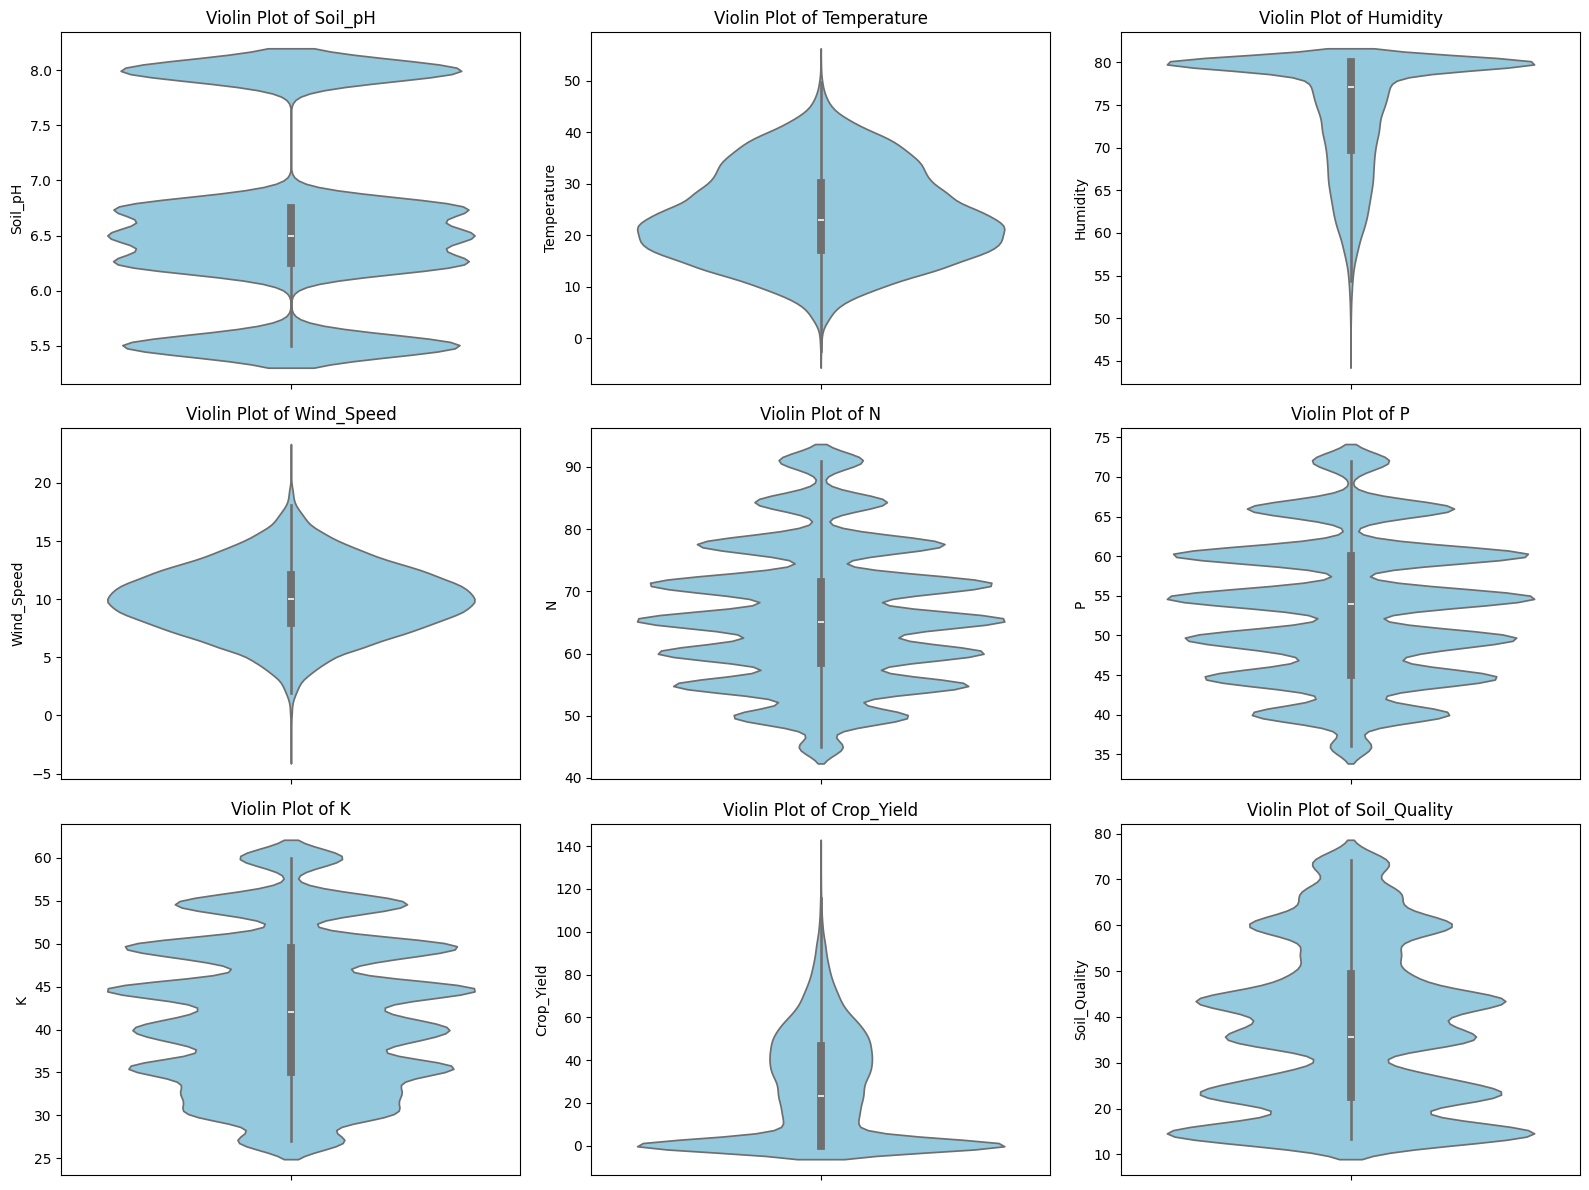

In [ ]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(y=df[col], color='skyblue')
    plt.title(f'Violin Plot of {col}')
    plt.tight_layout()


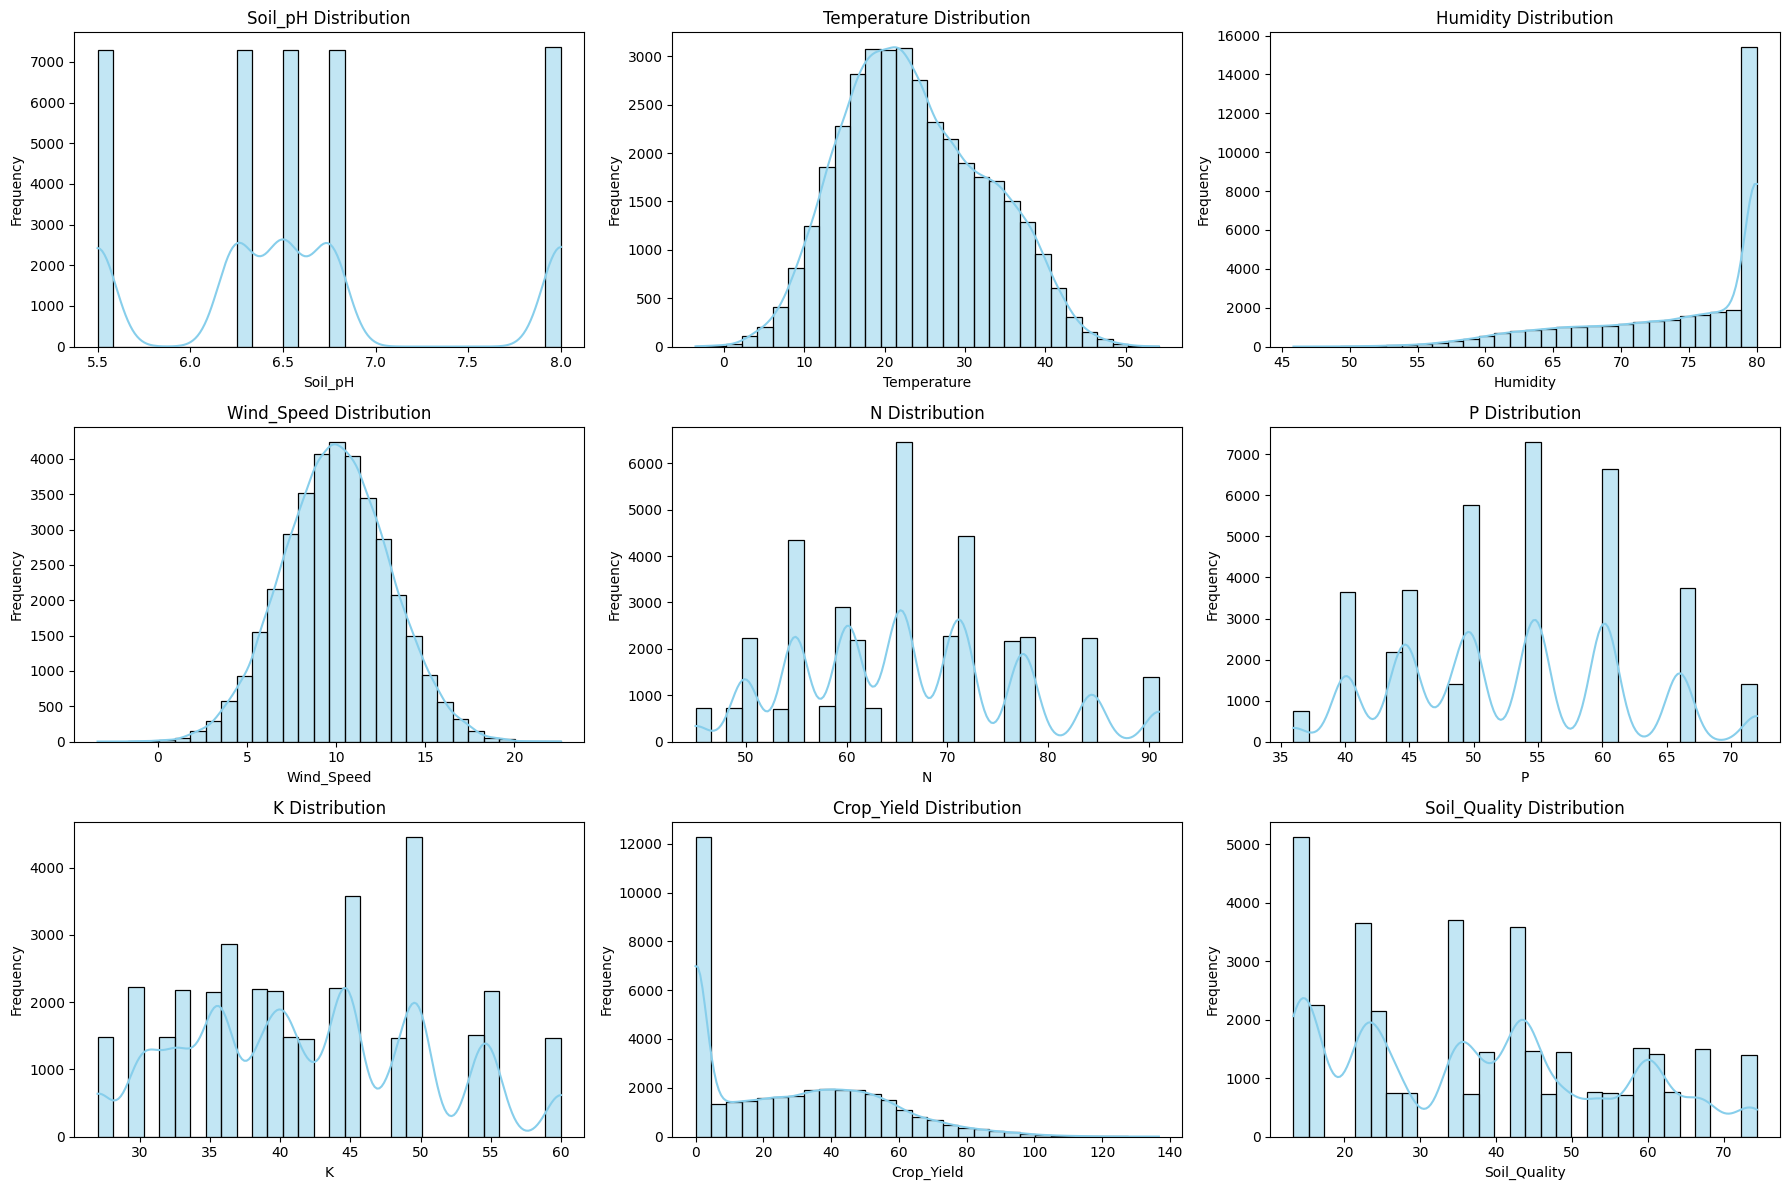

In [ ]:
# Create a grid of histograms with KDE
plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

The humidity countplot shows that there is a high number of instances with the highest humidity. This could lead to issues with the model being overfit. For now, it will be left alone, but it is something to keep in mind. Notice that the crop_yield feature has a lot of instances set to 0? In this dataset, the missing data is actually set to 0. This can be proven as it is highly unlikely to have a crop yield of exactly 0, especially in this many instances. The next step is to find out exactly how much of this data is missing.

## Handling Missing Values

In [ ]:
# Total number of rows
total_rows = len(df)

# Number of rows with Crop_Yield == 0
zero_yield_rows = len(df[df['Crop_Yield'] == 0])

# Calculate percentage
zero_yield_percent = (zero_yield_rows / total_rows) * 100

print(f"Rows with zero crop yield: {zero_yield_rows} out of {total_rows}")
print(f"Percentage of zero-yield rows: {zero_yield_percent:.2f}%")

Rows with zero crop yield: 11025 out of 36520
Percentage of zero-yield rows: 30.19%


Before handling the rows where Crop_Yield is recorded as 0, it is important to understand whether these values are missing at random (MAR) or not. In real-world agricultural datasets, zero values in yield could indicate actual crop failure, data entry errors, or simply unavailable measurements. To investigate this, we perform statistical hypothesis testing to check whether the other numerical features (like temperature, pH, nutrients, etc.) differ significantly between the zero-yield group and the non-zero-yield group. We use ***Welch’s t-test***, a robust version of the t-test that does not assume equal variances or equal sample sizes, to compare the means of each numeric feature across the two groups.

Welch’s t-test (for continuous values):
*   Does not assume equal variance
*   Works well when sample sizes are unequal (which they are: 30% vs 70%)

| Type     | What It Means                                                                                                   |
| -------- | --------------------------------------------------------------------------------------------------------------- |
| **MCAR** | Missing Completely At Random — unrelated to any feature                                                         |
| **MAR**  | Missing At Random — related to **some** observed features                                                       |
| **MNAR** | Missing Not At Random — related to the **unobserved value itself** (e.g., very low yield intentionally missing) |


A statistically significant difference (p-value < 0.05) would suggest that the missingness in yield may be influenced by other observed variables — thus indicating Missing At Random (MAR).
> P-value < 0.05 → Feature is significantly different → Suggests MAR

> P-value ≥ 0.05 → No significant difference → Might be MCAR

In [ ]:
from scipy.stats import ttest_ind

# List of numerical columns (excluding Crop_Yield itself)
num_cols = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

# Create binary flag for zero yield
df['Zero_Yield_Flag'] = (df['Crop_Yield'] == 0).astype(int)

# Separate the groups
zero_yield = df[df['Zero_Yield_Flag'] == 1]
non_zero_yield = df[df['Zero_Yield_Flag'] == 0]

# Run Welch's t-test for each numerical feature
print(f"{'Feature':<15} {'T-Statistic':>12} {'P-Value':>12} {'Conclusion':>15}")
print("="*55)

for col in num_cols:
    t_stat, p_val = ttest_ind(zero_yield[col], non_zero_yield[col], equal_var=False)
    conclusion = "Significant" if p_val < 0.05 else "Not Significant"
    print(f"{col:<15} {t_stat:>12.2f} {p_val:>12.4f} {conclusion:>15}")

Feature          T-Statistic      P-Value      Conclusion
Soil_pH                 0.79       0.4291 Not Significant
Temperature            62.95       0.0000     Significant
Humidity             -110.66       0.0000     Significant
Wind_Speed              1.72       0.0859 Not Significant
N                      -0.02       0.9869 Not Significant
P                       0.12       0.9077 Not Significant
K                       0.04       0.9678 Not Significant
Soil_Quality            0.20       0.8435 Not Significant


Missing At Random (MAR): Crop_Yield == 0 is statistically linked to Temperature and Humidity

Other features (e.g., NPK, Soil_pH, Soil_Quality) do not show significant changes between groups → these are not related to missing yield values

let’s now visualize the difference in Temperature and Humidity between the two groups:
*   Group 1: Crop_Yield == 0 (i.e., Zero_Yield_Flag == 1)
*   Group 2: Crop_Yield > 0 (i.e., Zero_Yield_Flag == 0)

We'll use:

📊 KDE Plots:
*   Show the full distribution of each feature in both groups
*   Make it easy to spot if one group has higher or lower values


> If curves peak at different places, the groups differ.

> The gap between them visually confirms the t-test result.

/tmp/ipython-input-18-2331232984.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Zero_Yield_Flag'] == 0]['Temperature'], label='Non-Zero Yield', shade=True)
/tmp/ipython-input-18-2331232984.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Zero_Yield_Flag'] == 1]['Temperature'], label='Zero Yield', shade=True)


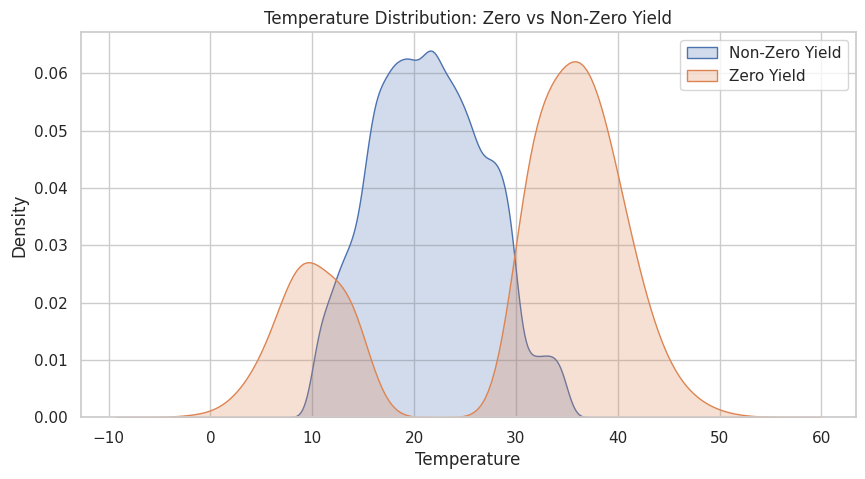

In [ ]:
# Set a style
sns.set(style="whitegrid")

# Plot KDE for Temperature
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Zero_Yield_Flag'] == 0]['Temperature'], label='Non-Zero Yield', shade=True)
sns.kdeplot(df[df['Zero_Yield_Flag'] == 1]['Temperature'], label='Zero Yield', shade=True)
plt.title("Temperature Distribution: Zero vs Non-Zero Yield")
plt.xlabel("Temperature")
plt.legend()
plt.show()


Visualize how the temperature is distributed across zero and non-zero yield samples. It helps visually confirm the statistical significance shown by the t-test.

/tmp/ipython-input-19-861164522.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Zero_Yield_Flag'] == 1]['Humidity'], label='Zero Yield', shade=True)


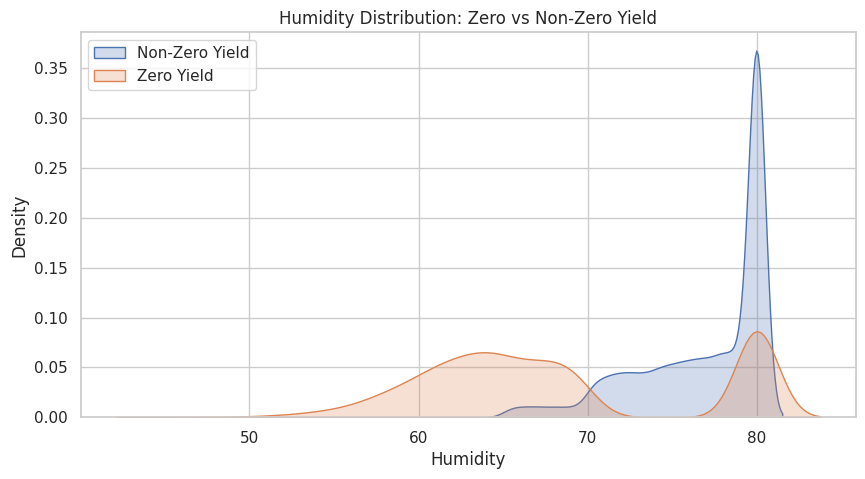

In [ ]:
# Plot KDE for Humidity
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Zero_Yield_Flag'] == 0]['Humidity'], label='Non-Zero Yield', shade=True)
sns.kdeplot(df[df['Zero_Yield_Flag'] == 1]['Humidity'], label='Zero Yield', shade=True)
plt.title("Humidity Distribution: Zero vs Non-Zero Yield")
plt.xlabel("Humidity")
plt.legend()
plt.show()

The distribution for zero-yield rows is shifted toward higher humidity, which supports the statistical test result. This indicates that extreme humidity may be linked to lower or failed yield, confirming Missing At Random.

Removing rows with Crop_Yield == 0, which are unrealistic at the regional level and likely indicate missing or erroneous data. This helps the model learn meaningful patterns.

In [ ]:
# Check initial shape
print("Original dataset shape:", df.shape)

# Remove all rows where Crop_Yield == 0
df = df[df['Crop_Yield'] != 0].reset_index(drop=True)

# Confirm the result
print("Cleaned dataset shape:", df.shape)

Original dataset shape: (36520, 12)
Cleaned dataset shape: (25495, 12)


> “Excluded zero-yield entries to reduce noise and avoid modeling biologically implausible values. This improves generalization and interpretability, though it limits failure prediction.”

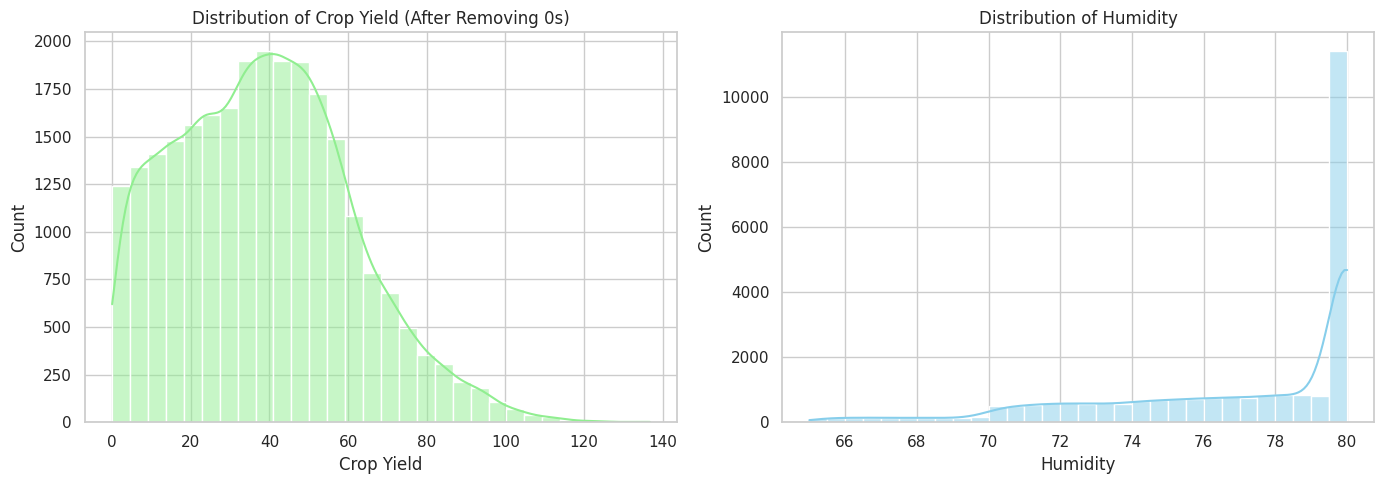

In [ ]:
# Set a visual style
sns.set(style="whitegrid")

# Create 1x2 plot layout
plt.figure(figsize=(14, 5))

# Histogram for Crop_Yield
plt.subplot(1, 2, 1)
sns.histplot(df['Crop_Yield'], kde=True, color='lightgreen', bins=30)
plt.title("Distribution of Crop Yield (After Removing 0s)")
plt.xlabel("Crop Yield")

# Histogram for Humidity
plt.subplot(1, 2, 2)
sns.histplot(df['Humidity'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Humidity")
plt.xlabel("Humidity")

plt.tight_layout()
plt.show()

## Label Encoding

In our dataset, the features Crop_Type and Soil_Type are categorical — they consist of names like "Wheat", "Rice", "Loamy", or "Sandy" instead of numerical values. Since machine learning models cannot work directly with string or text data, we need to convert these categories into a numerical format. However, the choice of encoding technique depends on the model type. Because we are using tree-based models like Random Forest, XGBoost, and CatBoost, we apply Label Encoding. Label encoding assigns each unique category a distinct integer. Unlike linear models, tree-based algorithms do not assume any mathematical relationship between these numbers, so this method works well and avoids unnecessary expansion of feature space (which would happen with one-hot encoding). We also store the encoders so we can later reverse the transformation for interpretation or predictions.

In [ ]:
print("Unique Crop Types:", df['Crop_Type'].unique())
print("Unique Soil Types:", df['Soil_Type'].unique())

Unique Crop Types: ['Corn' 'Barley' 'Soybean' 'Cotton' 'Tomato' 'Potato' 'Sunflower' 'Wheat'
 'Sugarcane' 'Rice']
Unique Soil Types: ['Loamy' 'Sandy' 'Peaty' 'Clay' 'Saline']


In [ ]:
# Step 1: Define the columns we want to encode
categorical_cols = ['Crop_Type', 'Soil_Type']

# Step 2: Create a dictionary to store the encoders for each column
label_encoders = {}

# Step 3: Apply label encoding to each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save the encoder for inverse transformation later

# Step 4: Preview the encoded dataset
df.head()

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Zero_Yield_Flag
0,1,1,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,0
1,0,4,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,0
2,5,2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,0
3,2,4,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000,0
4,8,0,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667,0


In [ ]:
label_encoders['Crop_Type'].inverse_transform([0, 1])

array(['Barley', 'Corn'], dtype=object)

In [ ]:
df.head(20)

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,Zero_Yield_Flag
0,1,1,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,0
1,0,4,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,0
2,5,2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,0
3,2,4,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000,0
4,8,0,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667,0
5,3,2,5.50,18.895963,80.000000,6.696707,60.5,45.0,31.5,54.259727,22.833333,0
6,7,1,6.50,16.865595,80.000000,9.311649,70.0,66.0,55.0,68.119250,63.666667,0
7,9,2,5.50,16.044318,80.000000,4.120990,60.5,45.0,31.5,28.723530,22.833333,0
8,1,0,6.25,15.984306,80.000000,10.655915,72.0,55.0,40.0,51.656273,48.708333,0
9,0,3,8.00,11.400779,80.000000,11.382449,65.0,55.0,45.0,8.159006,13.750000,0


In [ ]:
df.drop(columns = ['Zero_Yield_Flag'], inplace = True)

In [ ]:
print(df.columns)

Index(['Crop_Type', 'Soil_Type', 'Soil_pH', 'Temperature', 'Humidity',
       'Wind_Speed', 'N', 'P', 'K', 'Crop_Yield', 'Soil_Quality'],
      dtype='object')


# Correlation

## Pearson Correlation

Before building any predictive models, it is essential to understand how the features in our dataset relate to one another and to the target variable, Crop_Yield. To do this, we begin by computing the Pearson correlation matrix, which helps identify the strength and direction of linear relationships between numeric features. Pearson correlation values range from –1 (strong negative correlation) to +1 (strong positive correlation), with 0 indicating no linear relationship.

Visualizing this correlation matrix as a heatmap allows us to quickly spot which features are likely to be informative for prediction. It also helps in identifying potential issues such as multicollinearity — where two or more features are highly correlated with each other — which can affect certain types of models.

Although Pearson correlation is widely used, it assumes that variables are linearly related and approximately normally distributed. This assumption will be critically examined in the next step to determine whether it's valid for our data, particularly for skewed variables like Humidity. For now, this heatmap offers a strong baseline view of the underlying structure in our dataset.

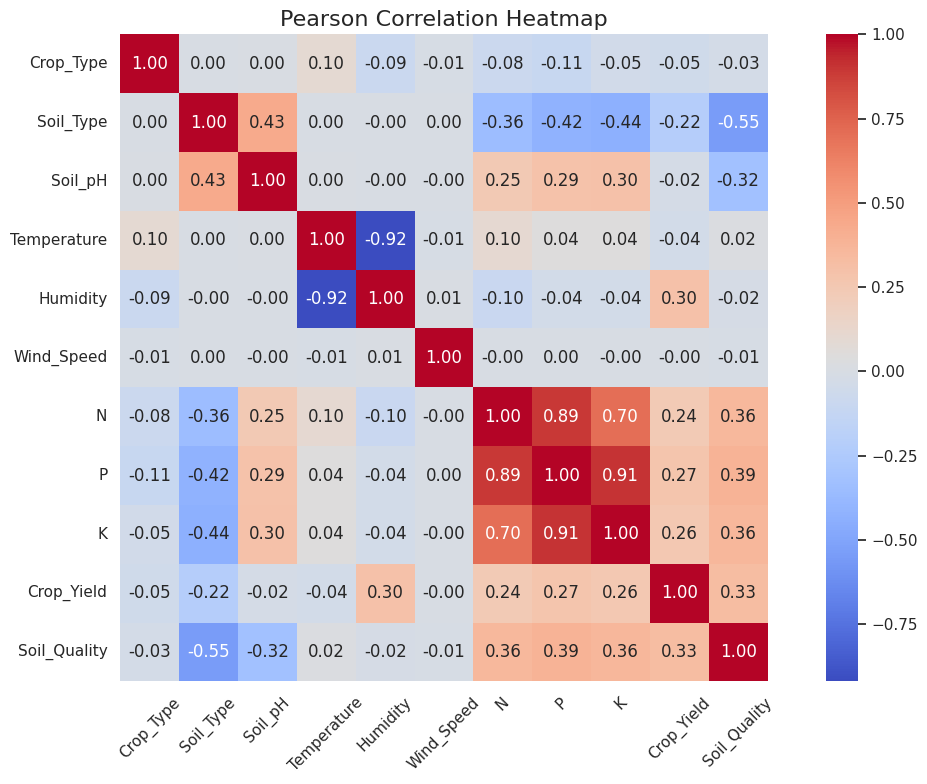

In [ ]:
# Set plot size and style
plt.figure(figsize=(12, 8))
plt.title("Pearson Correlation Heatmap", fontsize=16)

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In the earlier stages of exploratory analysis, we used Pearson correlation to measure linear relationships between features and the target variable, Crop_Yield. However, Pearson correlation assumes a normal distribution and linearity, which may not hold for all variables in our dataset. Specifically, the distribution of Humidity was found to be heavily right-skewed, as observed from its histogram and KDE plots. Such skewness can distort the true strength of relationships when using Pearson's method.

To address this, we now re-evaluate the correlations using Spearman correlation, a non-parametric alternative that assesses monotonic relationships between variables. Unlike Pearson, Spearman operates on rank-order rather than actual values, making it more robust to outliers and skewed distributions. This approach helps uncover hidden trends and ensures that our interpretation of feature importance, especially for variables like Humidity, is more reliable and statistically sound.

By comparing Spearman coefficients with the earlier Pearson results, we aim to gain a more holistic understanding of the feature-target relationships and make better-informed decisions for feature selection and model design.

## Spearman Correlation

In [ ]:
# Spearman correlation (robust to skew)
spearman_corr = df.corr(method='spearman')
print("Spearman correlation with Crop_Yield:\n")
print(spearman_corr['Crop_Yield'].sort_values(ascending=False))

Spearman correlation with Crop_Yield:

Crop_Yield      1.000000
Soil_Quality    0.274647
P               0.228845
K               0.216769
N               0.190760
Humidity        0.150157
Wind_Speed     -0.002902
Soil_pH        -0.016716
Temperature    -0.031273
Crop_Type      -0.052036
Soil_Type      -0.199248
Name: Crop_Yield, dtype: float64


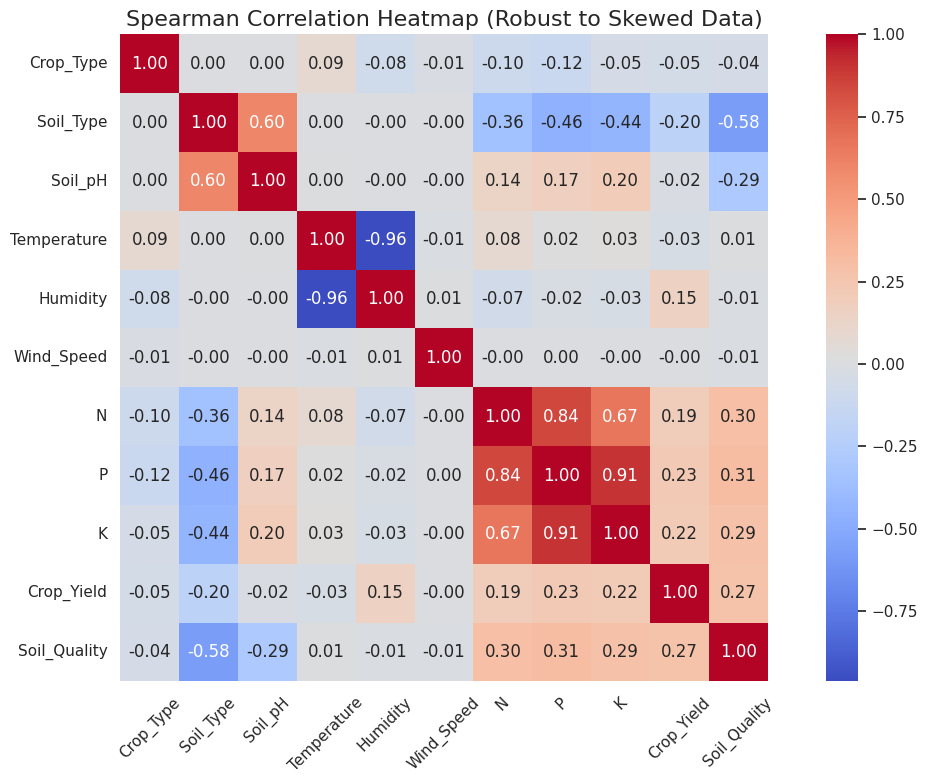

In [ ]:
# Compute Spearman correlation matrix
spearman_corr = df.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Spearman Correlation Heatmap (Robust to Skewed Data)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Correlation Analysis: Pearson vs. Spearman

---

We analyzed the correlation between features and the target variable `Crop_Yield` using both **Pearson** and **Spearman** correlation methods.

#### 🔍 Why Both?

* **Pearson correlation** measures linear relationships and assumes normal distribution.
* **Spearman correlation** is **rank-based** and better suited for **skewed or non-linear** data.
* Since the `Humidity` feature showed a **highly right-skewed distribution**, Pearson may have **overestimated** its influence on `Crop_Yield`.

---

#### 💡 **Key Insights:**

| Feature           | Pearson Corr | Spearman Corr | Interpretation                                                |
| ----------------- | ------------ | ------------- | ------------------------------------------------------------- |
| **Humidity**      | +0.30        | +0.15         | Effect is likely non-linear and was overestimated by Pearson. |
| **P**             | +0.27        | +0.23         | Strong and consistent predictor of yield.                     |
| **K**             | +0.26        | +0.22         | Same as above.                                                |
| **N**             | +0.24        | +0.19         | Nutrient features are moderately useful.                      |
| **Soil\_Quality** | +0.33        | +0.27         | Aggregated nutrient score — potentially redundant.            |
| **Others**        | \~0          | \~0           | No strong impact on yield.                                    |

---

#### ✅ Final Takeaways:

* We will **retain** all features for now since we’re using **tree-based models** (which are not affected by multicollinearity).
* **Spearman correlation** gave us a better real-world view of how features influence yield under **non-normal conditions**.

---

# Feature Engineering

To enhance model performance and capture hidden relationships, we introduce new engineered features based on domain expertise and agronomic intuition:

| Feature Name              | Description                                                                         |
| ------------------------- | ----------------------------------------------------------------------------------- |
| **NPK\_Ratio**            | Ratio of Nitrogen to combined Phosphorus & Potassium — indicates nutrient balance.  |
| **Soil\_Nutrient\_Score** | Average of N, P, and K — acts as a single soil fertility indicator.                 |
| **Temp\_Humidity\_Index** | Interaction term combining temperature and humidity — represents climatic pressure. |


We’ll create three new features from existing ones:

---


1. **`NPK_Ratio`**

   $$
   \text{NPK\_Ratio} = \frac{N}{P + K + \varepsilon}
   $$

   To avoid division by zero, we add a very small epsilon.

2. **`Soil_Nutrient_Score`**

   $$
   \text{Soil\_Nutrient\_Score} = \frac{N + P + K}{3}
   $$

   Simple average of macronutrients.

3. **`Temp_Humidity_Index`**

   $$
   \text{Temp\_Humidity\_Index} = \text{Temperature} \times \text{Humidity}
   $$

   Captures the combined effect of heat and moisture.

In [ ]:
# Feature Engineering

# Add epsilon to prevent division by zero
epsilon = 1e-5

# 1. NPK Ratio
df['NPK_Ratio'] = df['N'] / (df['P'] + df['K'] + epsilon)

# 2. Soil Nutrient Score (mean of N, P, K)
df['Soil_Nutrient_Score'] = (df['N'] + df['P'] + df['K']) / 3

# 3. Temp-Humidity Index
df['Temp_Humidity_Index'] = df['Temperature'] * df['Humidity']

# Preview the new columns
df[['NPK_Ratio', 'Soil_Nutrient_Score', 'Temp_Humidity_Index']].head()

,NPK_Ratio,Soil_Nutrient_Score,Temp_Humidity_Index
0,0.724138,66.666667,1603.151821
1,0.714286,40.000000,1580.147873
2,0.592814,44.333333,1288.831561
3,0.687500,45.000000,1186.139126
4,0.705882,48.333333,1465.861737


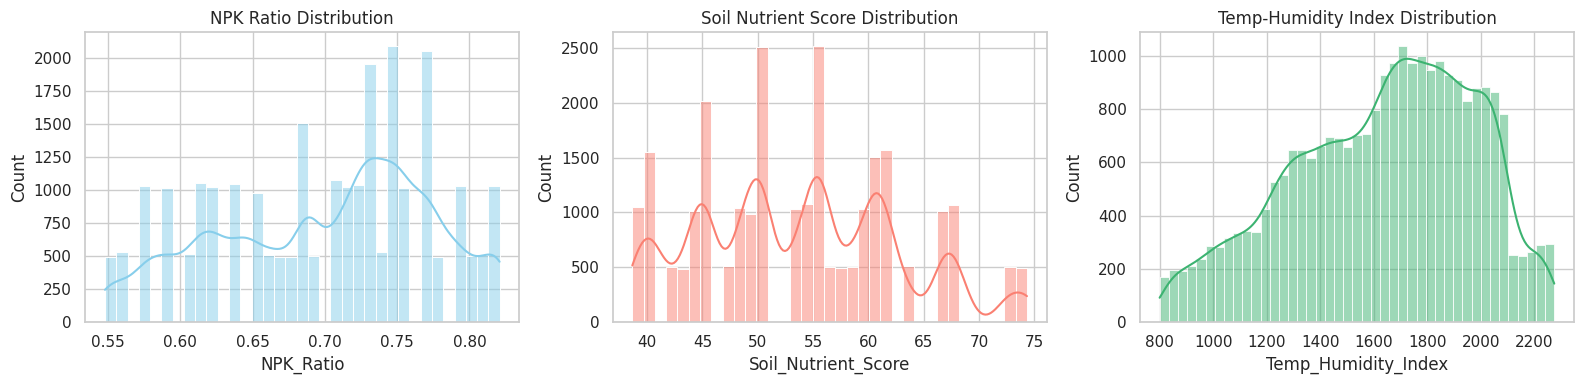

In [ ]:
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4))

# Plot NPK Ratio
plt.subplot(1, 3, 1)
sns.histplot(df['NPK_Ratio'], kde=True, color='skyblue')
plt.title('NPK Ratio Distribution')

# Plot Soil Nutrient Score
plt.subplot(1, 3, 2)
sns.histplot(df['Soil_Nutrient_Score'], kde=True, color='salmon')
plt.title('Soil Nutrient Score Distribution')

# Plot Temp-Humidity Index
plt.subplot(1, 3, 3)
sns.histplot(df['Temp_Humidity_Index'], kde=True, color='mediumseagreen')
plt.title('Temp-Humidity Index Distribution')

plt.tight_layout()
plt.show()

| Feature                   | Distribution Insights                                                                 | Potential Modeling Impact                                                                                                                       |
| ------------------------- | ------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **NPK\_Ratio**            | Fairly uniform with peaks between 0.7 and 0.8.                                        | Indicates a common nutrient balance; good input for models since it’s not heavily skewed.                                                       |
| **Soil\_Nutrient\_Score** | Appears **multi-modal** due to clustering of N, P, K values (e.g., fertilizer doses). | Suggests multiple fertility zones; may help tree-based models split on those patterns.                                                          |
| **Temp\_Humidity\_Index** | Right-skewed with a strong peak around 1800–2000.                                     | Reflects saturation of Humidity at 80; this index compresses variability in climate stress, possibly helping capture subtle effects on yield. |


These engineered features are not only interpretable but also introduce non-linear interactions that models like Random Forest and XGBoost can leverage effectively. We will retain them in the dataset.

# Feature Selection

---
This step helps reduce dimensionality, improve model generalization, and remove redundant or noisy features.

To identify the most influential variables for crop yield prediction, we perform **feature selection** using statistical and model-based approaches. This helps reduce overfitting, speeds up training, and improves interpretability.

We apply:

* **Correlation-based filtering**: Remove features that are weakly correlated with the target (`Crop_Yield`) using both Pearson and Spearman correlation coefficients.
* **Tree-based feature importance**: Use Random Forest to compute the contribution of each feature in reducing prediction error.
---

In [ ]:
df.head(20)

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,NPK_Ratio,Soil_Nutrient_Score,Temp_Humidity_Index
0,1,1,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,0.724138,66.666667,1603.151821
1,0,4,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,0.714286,40.000000,1580.147873
2,5,2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,0.592814,44.333333,1288.831561
3,2,4,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000,0.687500,45.000000,1186.139126
4,8,0,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667,0.705882,48.333333,1465.861737
5,3,2,5.50,18.895963,80.000000,6.696707,60.5,45.0,31.5,54.259727,22.833333,0.790850,45.666667,1511.677054
6,7,1,6.50,16.865595,80.000000,9.311649,70.0,66.0,55.0,68.119250,63.666667,0.578512,63.666667,1349.247566
7,9,2,5.50,16.044318,80.000000,4.120990,60.5,45.0,31.5,28.723530,22.833333,0.790850,45.666667,1283.545438
8,1,0,6.25,15.984306,80.000000,10.655915,72.0,55.0,40.0,51.656273,48.708333,0.757895,55.666667,1278.744494
9,0,3,8.00,11.400779,80.000000,11.382449,65.0,55.0,45.0,8.159006,13.750000,0.650000,55.000000,912.062317


"We performed correlation analysis during preprocessing to understand relationships and reduce multicollinearity. However, for feature selection, we rely on model-based methods like Random Forest, which better capture non-linear and multivariate dependencies without being biased by correlation alone."

We'll fit a Random Forest Regressor on the current dataset and compute feature importance scores, which indicate how useful each feature is in predicting crop yield.


RandomForestRegressor builds many decision trees and measures how much each feature reduces prediction error when used in a split.

Features with higher scores are more influential in determining crop yield.

This method automatically handles non-linear relationships and interaction effects, unlike correlation matrices.

/tmp/ipython-input-34-599026246.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


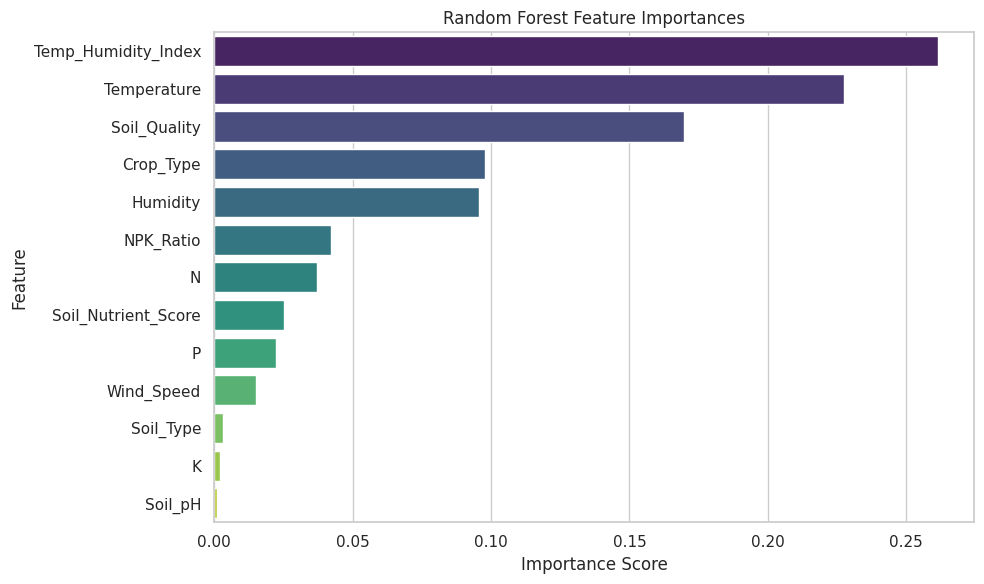

In [ ]:
# 1. Define input features and target
X = df.drop(columns=['Crop_Yield'])
y = df['Crop_Yield']

# 2. Split data for stability (no shuffling since it's synthetic, but set random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# 5. Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The feature importance plot derived from the Random Forest Regressor highlights that Temp_Humidity_Index, Temperature, and Soil_Quality are the most influential predictors of crop yield in the dataset. These features received the highest importance scores, indicating they contributed significantly to reducing prediction error across decision trees.

Interestingly, while classical agronomic features like N (Nitrogen), P (Phosphorus), and K (Potassium) are moderately important, derived indicators like NPK_Ratio and Soil_Nutrient_Score offer better predictive power, possibly due to their ability to capture balance rather than raw magnitude.

Features such as Soil_pH, Soil_Type, and K were found to have negligible influence, which might be due to low variance or weak nonlinear relationships with yield in this dataset. This justifies potential dimensionality reduction, where we could drop low-importance features to reduce model complexity without significantly impacting performance.

In [ ]:
df.to_csv('CYP_dataset_cleaned.csv', index=False)

In [ ]:
from google.colab import files
files.download('CYP_dataset_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality,NPK_Ratio,Soil_Nutrient_Score,Temp_Humidity_Index
0,1,1,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667,0.724138,66.666667,1603.151821
1,0,4,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000,0.714286,40.000000,1580.147873
2,5,2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667,0.592814,44.333333,1288.831561
3,2,4,6.75,14.826739,80.000000,10.366657,55.0,44.0,36.0,29.356115,39.375000,0.687500,45.000000,1186.139126
4,8,0,6.25,18.323272,80.000000,8.198084,60.0,45.0,40.0,22.221375,42.291667,0.705882,48.333333,1465.861737


To identify the most influential features for predicting crop yield, we applied Recursive Feature Elimination (RFE) using a RandomForestRegressor as the base estimator. RFE works by recursively removing less important features and fitting the model until the most critical ones remain. In this analysis, we instructed RFE to rank all features by importance, selecting only the top one for emphasis. This step is vital in understanding which attributes contribute the most to prediction accuracy and can help simplify models, reduce overfitting, and enhance interpretability.

In [ ]:
from sklearn.feature_selection import RFE

# Step 1: Separate features and target
X = df.drop(columns=["Crop_Yield"])  # Only drop the target column
y = df["Crop_Yield"]

# Step 2: Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 3: Apply RFE to rank features
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(X, y)

# Step 4: Create and display a ranking DataFrame
ranking_df = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe.ranking_,
    "Selected (Top Feature)": rfe.support_
}).sort_values(by="Ranking")

ranking_df.reset_index(drop=True, inplace=True)
ranking_df


,Feature,Ranking,Selected (Top Feature)
0,Temperature,1,True
1,Soil_Quality,2,False
2,Temp_Humidity_Index,3,False
3,Crop_Type,4,False
4,Humidity,5,False
5,N,6,False
6,NPK_Ratio,7,False
7,Soil_Nutrient_Score,8,False
8,P,9,False
9,Wind_Speed,10,False


The RFE process identified the Temperature feature as the most significant predictor of Crop_Yield, followed closely by Soil_Quality, Temp_Humidity_Index, and Crop_Type. Features like Soil_pH, K, and Soil_Type were ranked lowest, suggesting they have minimal direct impact on the target variable in this dataset. This insight can guide feature selection for future modeling stages.



> We will now filter the dataset to include only the top 6 selected features and the target variable (Crop_Yield).



In [ ]:
# Define selected features and target
selected_features = [
    "Temperature",
    "Soil_Quality",
    "Temp_Humidity_Index",
    "Crop_Type",
    "Humidity",
    "NPK_Ratio"
]

target_variable = "Crop_Yield"

# Create new filtered DataFrame
df_filtered = df[selected_features + [target_variable]]

# Display top rows to verify
df_filtered.head()

,Temperature,Soil_Quality,Temp_Humidity_Index,Crop_Type,Humidity,NPK_Ratio,Crop_Yield
0,20.052576,66.666667,1603.151821,1,79.947424,0.724138,104.871310
1,19.751848,35.000000,1580.147873,0,80.000000,0.714286,58.939796
2,16.110395,22.166667,1288.831561,5,80.000000,0.592814,32.970413
3,14.826739,39.375000,1186.139126,2,80.000000,0.687500,29.356115
4,18.323272,42.291667,1465.861737,8,80.000000,0.705882,22.221375


# Train-Test Split:

Before feeding data into machine learning models, it's essential to evaluate their performance on unseen data. This is achieved by splitting the dataset into training and testing subsets. Typically, 80% of the data is used for training the model, while the remaining 20% is reserved for testing. This ensures that our model learns patterns from the training data but is validated on a separate test set, helping assess generalization. Additionally, setting a random_state ensures that the split remains consistent across different runs.

In [ ]:
# Separate features and target
X = df_filtered.drop(columns=["Crop_Yield"])
y = df_filtered["Crop_Yield"]

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# View the shape of each dataset
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (20396, 6)
X_test shape: (5099, 6)


# Feature Scaling

Feature scaling is the process of bringing all numerical features to a comparable scale without distorting differences in the ranges of values. Although models like **Decision Trees** and **Random Forest** are not sensitive to feature scaling, **boosting models** like **XGBoost** and **CatBoost** benefit from scaled inputs for faster convergence and improved performance.

Here, we’ll apply **StandardScaler** from `sklearn.preprocessing`, which standardizes features by removing the mean and scaling to unit variance:

$$
z = \frac{(x - \mu)}{\sigma}
$$

This ensures each feature contributes equally during model training.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 3: Feature Scaling
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* `X_train_scaled` and `X_test_scaled` will now contain standardized features (mean ≈ 0, std ≈ 1).
* You **don’t** need to scale `y` (target), because we’re predicting raw crop yield values (regression output).

# Model Building and Evaluation

## Model Training: Decision Tree Regressor

In this step, we will train a Decision Tree Regressor, a non-parametric supervised learning method used for regression tasks. It splits the dataset into subsets based on feature values, creating a tree-like structure that

---

models decision paths.

Decision Trees are ideal for baseline modeling because:

- They handle non-linear relationships well.

- They are robust to outliers and don’t require feature scaling (but we've scaled for consistency with upcoming models).

- They are interpretable, helping us understand how features affect predictions.

We will:

1. Train the model on the training set.

2. Predict on the test set.

3. Evaluate performance using metrics like RMSE, MAE, and R² score.

In [ ]:
# Train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae = mean_absolute_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Results:\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}\nR² Score: {r2:.4f}")

Decision Tree Results:
RMSE: 6.1941
MAE: 4.3153
R² Score: 0.9241


### ✅ **Results Summary: Decision Tree Regressor**

The **Decision Tree Regressor** delivered strong performance on the test dataset, with the following evaluation metrics:

* **RMSE (Root Mean Squared Error):** 6.1941
* **MAE (Mean Absolute Error):** 4.3153
* **R² Score:** 0.9241

These metrics indicate that the model is accurately capturing the underlying patterns in the data. An **R² score of 0.92** suggests that 92% of the variance in crop yield is explained by the selected features. The low RMSE and MAE values confirm that prediction errors are small on average.

However, Decision Trees are prone to **overfitting**, especially when not pruned. While these initial results are promising, we should now proceed to **ensemble models** like **Random Forest** and **Gradient Boosting** to evaluate whether more robust generalization and accuracy gains are possible.

---

## Model Training: Random Forest Regressor (Baseline)

To build on the strong baseline established by the Decision Tree, we now train a Random Forest Regressor, an ensemble method that combines multiple decision trees to improve prediction accuracy and generalization. It helps mitigate overfitting by averaging multiple trees trained on different random subsets of the data and features.

This step includes training the model, making predictions, and evaluating performance using the same metrics: RMSE, MAE, and R² Score.

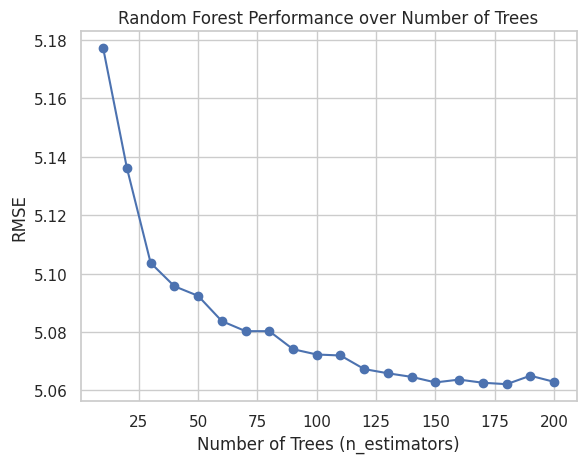

In [ ]:
# Track performance over number of trees
rmse_vals = []

for n in range(10, 201, 10):
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse_vals.append(np.sqrt(mean_squared_error(y_test, preds)))

# Plot
plt.plot(range(10, 201, 10), rmse_vals, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("RMSE")
plt.title("Random Forest Performance over Number of Trees")
plt.grid(True)
plt.show()

From the plot, we observe a steady decline in RMSE as the number of trees increases from 10 to approximately 160, after which the improvement plateaus. This indicates that around 160–180 trees offer an optimal trade-off between performance and computational efficiency. Adding more trees beyond this point results in negligible gains, suggesting that n_estimators=160 could be a well-balanced choice for model tuning.

In [ ]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

# Display results
print(f"Random Forest Results:\nRMSE: {rf_rmse:.4f}\nMAE: {rf_mae:.4f}\nR² Score: {rf_r2:.4f}")


Random Forest Results:
RMSE: 5.0723
MAE: 3.5144
R² Score: 0.9491


These results reflect high predictive accuracy, low average error, and an excellent fit between predicted and actual crop yields. The R² score of 0.95 indicates that the model explains 95% of the variance in the target variable.

### Hyperparameter Tuning for Random Forest Regressor

While Random Forest models perform robustly with default settings, their true potential often remains untapped without tuning key hyperparameters. In particular, parameters like n_estimators (number of trees), max_depth, and min_samples_split can significantly influence model performance and generalization. Although our initial Random Forest model achieved strong results (RMSE ≈ 5.07, R² ≈ 0.95), there is still scope for improvement. By applying hyperparameter tuning using techniques like grid search or randomized search, we aim to minimize prediction error further, reduce overfitting, and uncover a more optimal configuration tailored to our dataset. This step ensures the model not only fits the training data well but also performs consistently across unseen test data.

Let’s proceed with **hyperparameter tuning for Random Forest** using `RandomizedSearchCV` — which is more efficient than Grid Search when the parameter space is large.

---
To optimize the Random Forest model’s performance, we apply **RandomizedSearchCV**, which randomly samples from a defined range of hyperparameters and evaluates model performance using cross-validation. This approach is computationally efficient while still exploring a broad search space. The key hyperparameters we tune include:

* `n_estimators`: Number of trees in the forest
* `max_depth`: Maximum depth of each tree
* `min_samples_split`: Minimum samples required to split a node
* `min_samples_leaf`: Minimum samples required at a leaf node
* `max_features`: Number of features considered for the best split
* `bootstrap`: Whether bootstrap samples are used


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize base model
rf = RandomForestRegressor(random_state=42)

# Randomized search with 5-fold CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

# Fit on training data
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:\n", rf_random.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters:
 {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}


With the optimal hyperparameters identified, we now retrain the Random Forest Regressor on the full training data and evaluate it on the test set. This step quantifies how much performance improvement was achieved through tuning, using the same metrics: RMSE, MAE, and R² Score.

## Model Training: Random Forest Regressor (Tuned)

In [ ]:
# Instantiate with best params
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='log2',
    bootstrap=True,
    random_state=42
)

# Train
best_rf_model.fit(X_train, y_train)

# Predict
rf_tuned_preds = best_rf_model.predict(X_test)

# Evaluate
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned_preds))
rf_tuned_mae = mean_absolute_error(y_test, rf_tuned_preds)
rf_tuned_r2 = r2_score(y_test, rf_tuned_preds)

# Display
print(f"Tuned Random Forest Results:\nRMSE: {rf_tuned_rmse:.4f}\nMAE: {rf_tuned_mae:.4f}\nR² Score: {rf_tuned_r2:.4f}")


Tuned Random Forest Results:
RMSE: 4.6541
MAE: 3.2434
R² Score: 0.9571


### 🔍 Random Forest: Before vs After Hyperparameter Tuning

To enhance the predictive accuracy of our Random Forest model, we applied RandomizedSearchCV to identify optimal hyperparameters such as `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, and `max_features`. This fine-tuning process involved 5-fold cross-validation across 30 different parameter combinations. Below is a comparison of model performance before and after tuning:

| Metric         | Before Tuning | After Tuning  | % Improvement |
|----------------|---------------|----------------|----------------|
| **RMSE**       | 5.0723        | 4.6541         | ↓ ~8.24%       |
| **MAE**        | 3.5144        | 3.2434         | ↓ ~7.71%       |
| **R² Score**   | 0.9491        | 0.9571         | ↑ +0.84%       |

**Interpretation:**  
Hyperparameter tuning significantly improved the model's performance by reducing both RMSE and MAE, while slightly increasing the R² score. This indicates better generalization and more reliable yield predictions — making the tuned Random Forest a strong candidate for final deployment.


## Model Training: XGBoost Regressor (Baseline)

We now train a baseline XGBoost Regressor, which is a gradient boosting algorithm that builds trees sequentially and focuses on minimizing errors from previous trees. It’s known for its high performance and efficiency on structured/tabular data.

Unlike Random Forest, XGBoost:

- Uses boosting instead of bagging.

- Focuses on reducing bias (RF reduces variance).

- Is highly tunable and regularized to avoid overfitting.

- Can automatically handle missing values.

We’ll begin with default parameters to assess its initial performance.

In [ ]:
import xgboost as xgb

# Step 9.1: Baseline XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use this for regression tasks
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
xgb_preds = xgb_model.predict(X_test)

# Evaluate
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

# Print results
print(f"XGBoost (Baseline) Results:\nRMSE: {xgb_rmse:.4f}\nMAE: {xgb_mae:.4f}\nR² Score: {xgb_r2:.4f}")


XGBoost (Baseline) Results:
RMSE: 4.6527
MAE: 3.2732
R² Score: 0.9572


The baseline XGBoost model demonstrated strong performance, achieving an RMSE of 4.6527, MAE of 3.2732, and an R² score of 0.9572. These results slightly outperform the tuned Random Forest, highlighting the strength of gradient boosting in modeling non-linear patterns in crop yield prediction. This also indicates that XGBoost could benefit from fine-tuning to further optimize performance.

### Hyperparameter Tuning for XGBoost Regressor

To optimize the performance of the XGBoost model, we perform hyperparameter tuning using RandomizedSearchCV. This technique searches over a specified parameter space by sampling a fixed number of settings from the possible combinations. We aim to tune critical parameters such as n_estimators, learning_rate, max_depth, min_child_weight, subsample, and colsample_bytree. By performing cross-validated tuning over these parameters, we seek to reduce model error while avoiding overfitting.

In [ ]:
# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)

# Setup RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    verbose=1,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# Fit on training data
xgb_random_search.fit(X_train, y_train)

# Best model
best_xgb = xgb_random_search.best_estimator_
print("Best Parameters:\n", xgb_random_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
 {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


After hyperparameter tuning with RandomizedSearchCV, we re-evaluate the XGBoost model using the best-found parameter combination. This step ensures that the model's improvements reflect in real-world performance metrics such as RMSE, MAE, and R² Score, offering a fair comparison with the baseline and other models.

## Model Training: XGBoost Regressor (Tuned)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on test set using the tuned model
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Calculate performance metrics
mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mse_xgb_tuned)  # manually compute RMSE
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

# Display results
print("Tuned XGBoost Results:")
print(f"RMSE: {rmse_xgb_tuned:.4f}")
print(f"MAE: {mae_xgb_tuned:.4f}")
print(f"R² Score: {r2_xgb_tuned:.4f}")


Tuned XGBoost Results:
RMSE: 4.5899
MAE: 3.2006
R² Score: 0.9583


### 🔍 XGBoost: Before vs After Hyperparameter Tuning

To enhance the predictive performance of our XGBoost model, we applied **RandomizedSearchCV** to identify optimal hyperparameters including `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, and `min_child_weight`. The tuning process leveraged 5-fold cross-validation over 30 parameter combinations to find the best-performing configuration.

Below is a comparison of model performance before and after tuning:

| **Metric**   | **Before Tuning** | **After Tuning** | **% Improvement** |
| ------------ | ----------------- | ---------------- | ----------------- |
| **RMSE**     | 4.6527            | 4.5899           | ↓ \~1.35%         |
| **MAE**      | 3.2732            | 3.2006           | ↓ \~2.22%         |
| **R² Score** | 0.9572            | 0.9583           | ↑ +0.11%          |

---

### **Interpretation:**

Hyperparameter tuning of XGBoost led to a **notable reduction in error metrics** (RMSE and MAE), accompanied by a slight **increase in the R² score**. Although the improvements are marginal, they indicate better generalization and model stability. The tuned XGBoost is now more robust and reliable — reinforcing its status as a strong candidate for deployment alongside the tuned Random Forest model.


## Model Training: CatBoost Regressor (Baseline)

In [ ]:
from catboost import CatBoostRegressor

# Train baseline CatBoost model with default parameters
catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Predict on test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate performance
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)

# Print results
print("CatBoost (Baseline) Results:")
print(f"RMSE: {rmse_catboost:.4f}")
print(f"MAE: {mae_catboost:.4f}")
print(f"R² Score: {r2_catboost:.4f}")

CatBoost (Baseline) Results:
RMSE: 4.5496
MAE: 3.1711
R² Score: 0.9590


This already outperforms the tuned versions of both Decision Tree, Random Forest and XGBoost. Now, let’s move on to CatBoost hyperparameter tuning to further refine the performance.

## Model Training: CatBoost Regressor (Tuned)

In [ ]:
# Define CatBoost regressor with silent output
cat = CatBoostRegressor(verbose=0)

# Define the hyperparameter space to search
param_dist = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 200, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128]
}

# Setup randomized search with 5-fold cross-validation
random_search_cb = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit on training data
random_search_cb.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:\n", random_search_cb.best_params_)

# Predict with best estimator
y_pred_cb_tuned = random_search_cb.best_estimator_.predict(X_test)

# Evaluate performance
rmse_cb_tuned = mean_squared_error(y_test, y_pred_cb_tuned) ** 0.5
mae_cb_tuned = mean_absolute_error(y_test, y_pred_cb_tuned)
r2_cb_tuned = r2_score(y_test, y_pred_cb_tuned)

print("\nTuned CatBoost Results:")
print(f"RMSE: {rmse_cb_tuned:.4f}")
print(f"MAE: {mae_cb_tuned:.4f}")
print(f"R² Score: {r2_cb_tuned:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:
 {'learning_rate': 0.05, 'l2_leaf_reg': 5, 'iterations': 500, 'depth': 10, 'border_count': 128}

Tuned CatBoost Results:
RMSE: 4.5180
MAE: 3.1469
R² Score: 0.9596


### 🔍 CatBoost: Before vs After Hyperparameter Tuning

To further refine the predictive power of the CatBoost model, we performed hyperparameter tuning using `RandomizedSearchCV`. Key parameters such as `learning_rate`, `depth`, `iterations`, `l2_leaf_reg`, and `border_count` were explored across 30 randomized combinations, using 5-fold cross-validation. The goal was to reduce overfitting and enhance generalization. Below is a comparative summary of the CatBoost model's performance before and after tuning:

| **Metric**   | **Before Tuning** | **After Tuning** | **% Improvement** |
| ------------ | ----------------: | ---------------: | ----------------: |
| **RMSE**     |            4.5496 |           4.5180 |         ↓ \~0.70% |
| **MAE**      |            3.1711 |           3.1469 |         ↓ \~0.76% |
| **R² Score** |            0.9590 |           0.9596 |          ↑ +0.06% |

---

### **Interpretation:**

While the CatBoost model already demonstrated strong baseline performance, fine-tuning led to marginal yet consistent improvements in all three evaluation metrics. The reduced RMSE and MAE indicate slightly better error minimization, and the increased R² reflects enhanced model reliability. This confirms that even well-performing models like CatBoost can benefit from parameter optimization for final deployment.


# Results Visualization

After training and fine-tuning four different regression models — Decision Tree, Random Forest, XGBoost, and CatBoost — we evaluated their performance using RMSE, MAE, and R² Score. The table below presents a consolidated view of how each model performed before and after hyperparameter tuning.

| **Model**           |   **RMSE** |    **MAE** | **R² Score** |
| ------------------- | ---------: | ---------: | -----------: |
| Decision Tree       |     6.1941 |     4.3153 |       0.9241 |
| Random Forest (Baseline)       |     5.0723 |     3.5144 |       0.9491 |
| Random Forest (Tuned)|     4.6541 |     3.2434 |       0.9571 |
| XGBoost (Baseline)         |     4.6527 |     3.2732 |       0.9572 |
| XGBoost (Tuned)     |     4.5899 |     3.2006 |       0.9583 |
| CatBoost (Baseline)           |     4.5496 |     3.1711 |       0.9590 |
| CatBoost (Tuned) | **4.5180** | **3.1469** |   **0.9596** |


/tmp/ipython-input-53-701182893.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Model", data=comparison_df, ax=axes[0], palette="coolwarm")
/tmp/ipython-input-53-701182893.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MAE", y="Model", data=comparison_df, ax=axes[1], palette="crest")
/tmp/ipython-input-53-701182893.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=comparison_df, ax=axes[2], palette="mako")


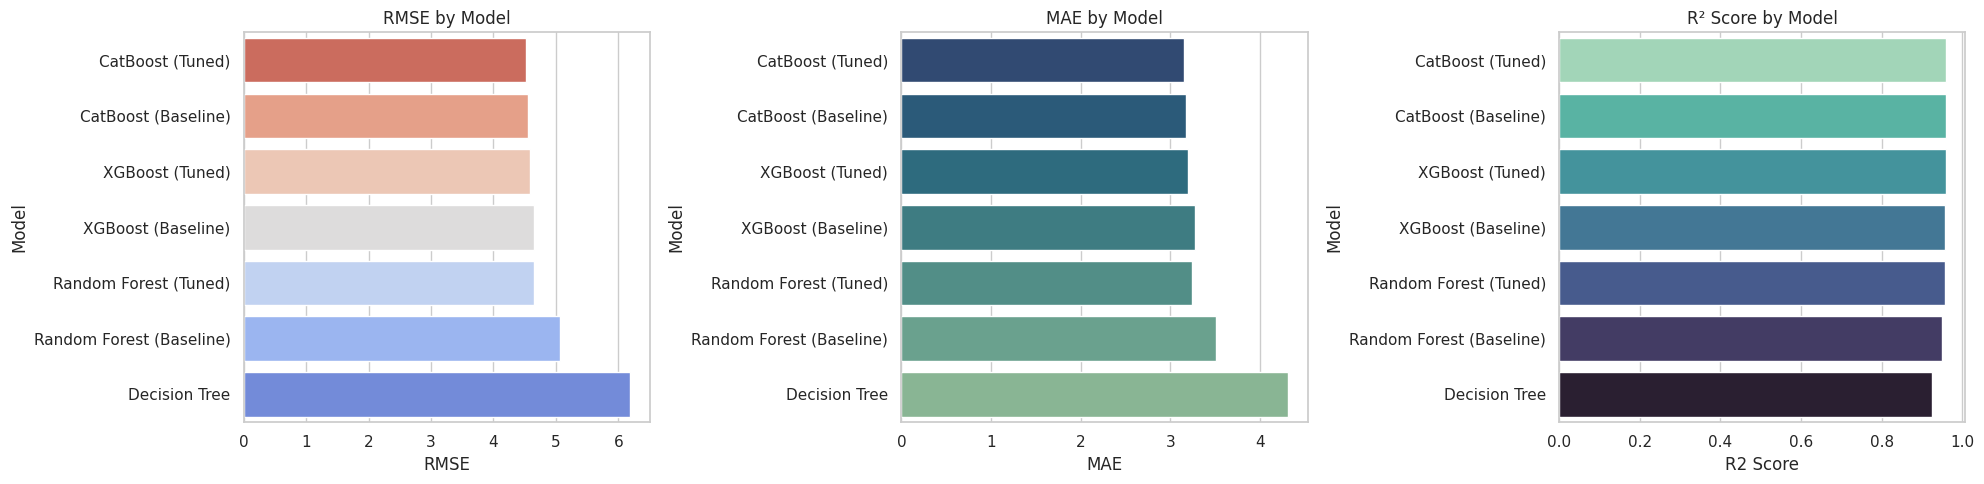

In [ ]:
# Step 1: Prepare comparison data
comparison_df = pd.DataFrame({
    "Model": [
        "Decision Tree",
        "Random Forest (Baseline)", "Random Forest (Tuned)",
        "XGBoost (Baseline)", "XGBoost (Tuned)",
        "CatBoost (Baseline)", "CatBoost (Tuned)"
    ],
    "RMSE": [6.1941, 5.0723, 4.6541, 4.6527, 4.5899, 4.5496, 4.5180],
    "MAE": [4.3153, 3.5144, 3.2434, 3.2732, 3.2006, 3.1711, 3.1469],
    "R2 Score": [0.9241, 0.9491, 0.9571, 0.9572, 0.9583, 0.9590, 0.9596]
})

# Step 2: Display table
import pandas.io.formats.style
comparison_df.style.set_caption("Model Performance Comparison")

# Step 3: Plotting all 3 metrics
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# RMSE plot
sns.barplot(x="RMSE", y="Model", data=comparison_df, ax=axes[0], palette="coolwarm")
axes[0].set_title("RMSE by Model")
axes[0].invert_yaxis()

# MAE plot
sns.barplot(x="MAE", y="Model", data=comparison_df, ax=axes[1], palette="crest")
axes[1].set_title("MAE by Model")
axes[1].invert_yaxis()

# R² Score plot
sns.barplot(x="R2 Score", y="Model", data=comparison_df, ax=axes[2], palette="mako")
axes[2].set_title("R² Score by Model")
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()


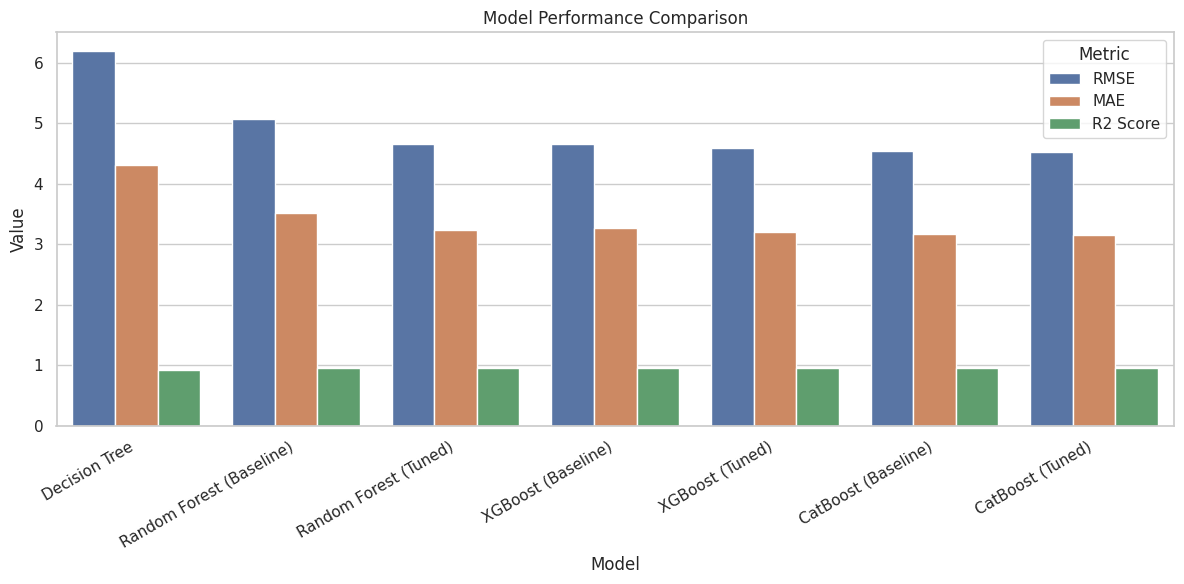

In [ ]:
# Performance results
results = {
    "Model": [
        "Decision Tree",
        "Random Forest (Baseline)",
        "Random Forest (Tuned)",
        "XGBoost (Baseline)",
        "XGBoost (Tuned)",
        "CatBoost (Baseline)",
        "CatBoost (Tuned)"
    ],
    "RMSE": [6.1941, 5.0723, 4.6541, 4.6527, 4.5899, 4.5496, 4.5180],
    "MAE": [4.3153, 3.5144, 3.2434, 3.2732, 3.2006, 3.1711, 3.1469],
    "R2 Score": [0.9241, 0.9491, 0.9571, 0.9572, 0.9583, 0.9590, 0.9596]
}

# Create DataFrame
df_results = pd.DataFrame(results)

# Melt for plotting
melted_df = df_results.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x="Model", y="Value", hue="Metric")
plt.title("Model Performance Comparison")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipython-input-55-944890700.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="Model", y="RMSE", data=df, palette="Blues_d")
/tmp/ipython-input-55-944890700.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x="Model", y="MAE", data=df, palette="Greens_d")
/tmp/ipython-input-55-944890700.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x="Model", y="R² Score", data=df, palette="Oranges_d")


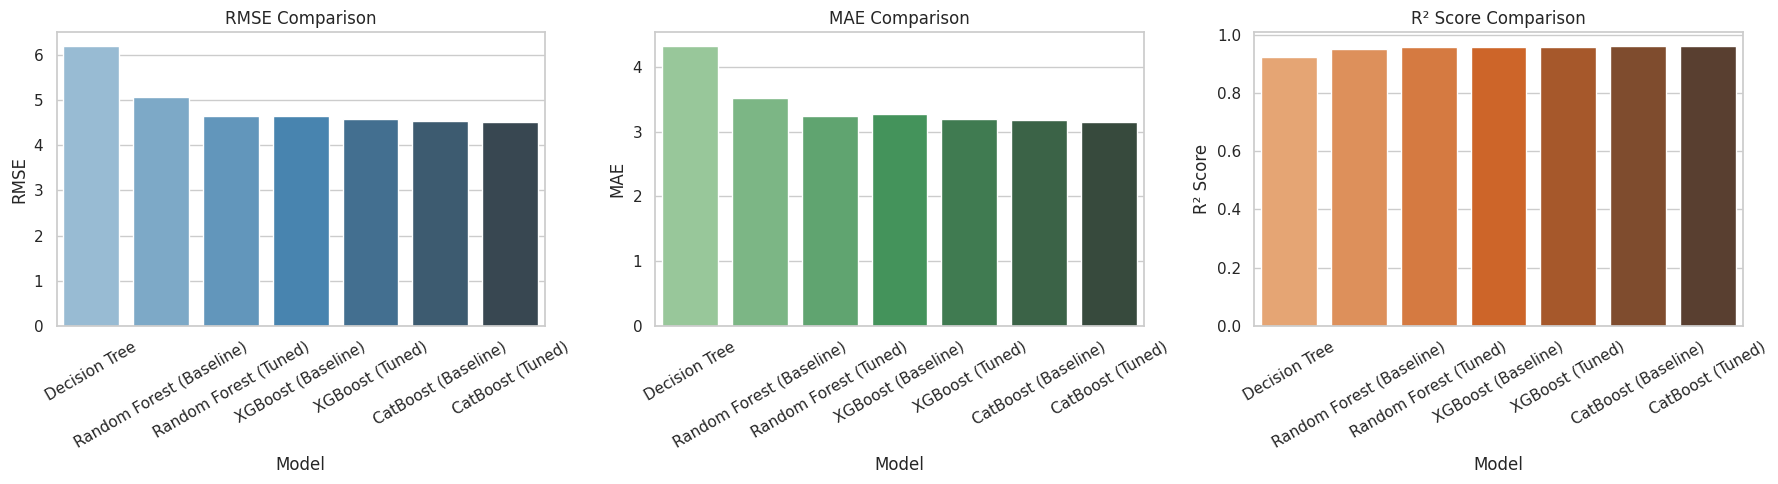

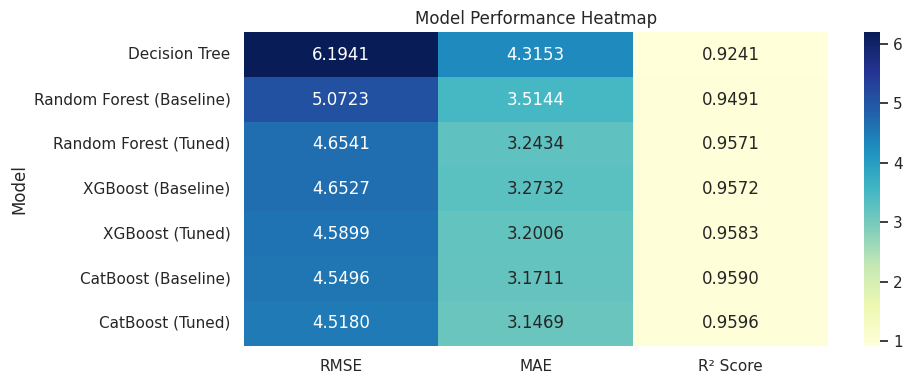

In [ ]:
# Reconstruct the model results
results = {
    "Model": [
        "Decision Tree",
        "Random Forest (Baseline)",
        "Random Forest (Tuned)",
        "XGBoost (Baseline)",
        "XGBoost (Tuned)",
        "CatBoost (Baseline)",
        "CatBoost (Tuned)"
    ],
    "RMSE": [6.1941, 5.0723, 4.6541, 4.6527, 4.5899, 4.5496, 4.5180],
    "MAE": [4.3153, 3.5144, 3.2434, 3.2732, 3.2006, 3.1711, 3.1469],
    "R² Score": [0.9241, 0.9491, 0.9571, 0.9572, 0.9583, 0.9590, 0.9596]
}

df = pd.DataFrame(results)

# Separate Bar Plots (Subplots)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(ax=axes[0], x="Model", y="RMSE", data=df, palette="Blues_d")
axes[0].set_title("RMSE Comparison")
axes[0].tick_params(axis='x', rotation=30)

sns.barplot(ax=axes[1], x="Model", y="MAE", data=df, palette="Greens_d")
axes[1].set_title("MAE Comparison")
axes[1].tick_params(axis='x', rotation=30)

sns.barplot(ax=axes[2], x="Model", y="R² Score", data=df, palette="Oranges_d")
axes[2].set_title("R² Score Comparison")
axes[2].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

# Heatmap of model metrics
plt.figure(figsize=(10, 4))
heatmap_data = df.set_index("Model")
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Model Performance Heatmap")
plt.tight_layout()
plt.show()


/tmp/ipython-input-56-2985109498.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x="Model", y="RMSE", data=df, palette="Blues_d")
/tmp/ipython-input-56-2985109498.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x="Model", y="MAE", data=df, palette="Greens_d")
/tmp/ipython-input-56-2985109498.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x="Model", y="R² Score", data=df, palette="Oranges_d")


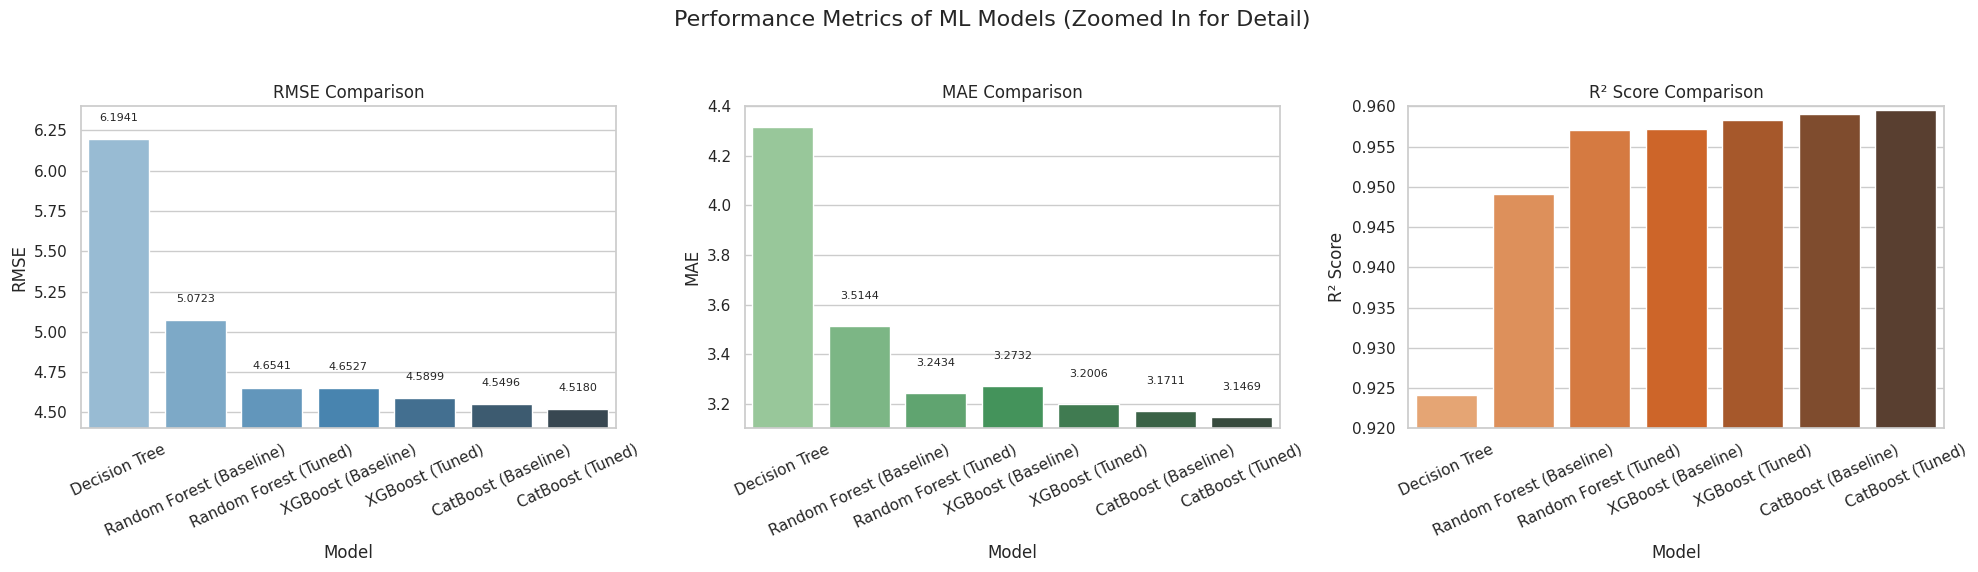

In [ ]:
# Reconstruct the model results
results = {
    "Model": [
        "Decision Tree",
        "Random Forest (Baseline)",
        "Random Forest (Tuned)",
        "XGBoost (Baseline)",
        "XGBoost (Tuned)",
        "CatBoost (Baseline)",
        "CatBoost (Tuned)"
    ],
    "RMSE": [6.1941, 5.0723, 4.6541, 4.6527, 4.5899, 4.5496, 4.5180],
    "MAE": [4.3153, 3.5144, 3.2434, 3.2732, 3.2006, 3.1711, 3.1469],
    "R² Score": [0.9241, 0.9491, 0.9571, 0.9572, 0.9583, 0.9590, 0.9596]
}

df = pd.DataFrame(results)

# Helper function to add labels on top of bars
def add_value_labels(ax, spacing=0.1):
    for bar in ax.patches:
        ax.annotate(f'{bar.get_height():.4f}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height() + spacing),
                    ha='center', va='bottom', fontsize=8)

# Subplots for RMSE, MAE, R²
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.set(style="whitegrid")

# RMSE Plot
sns.barplot(ax=axes[0], x="Model", y="RMSE", data=df, palette="Blues_d")
axes[0].set_title("RMSE Comparison")
axes[0].set_ylim(4.4, 6.4)  # Zoomed in
axes[0].tick_params(axis='x', rotation=25)
add_value_labels(axes[0])

# MAE Plot
sns.barplot(ax=axes[1], x="Model", y="MAE", data=df, palette="Greens_d")
axes[1].set_title("MAE Comparison")
axes[1].set_ylim(3.1, 4.4)  # Zoomed in
axes[1].tick_params(axis='x', rotation=25)
add_value_labels(axes[1])

# R² Score Plot
sns.barplot(ax=axes[2], x="Model", y="R² Score", data=df, palette="Oranges_d")
axes[2].set_title("R² Score Comparison")
axes[2].set_ylim(0.92, 0.96)  # Zoomed in
axes[2].tick_params(axis='x', rotation=25)
add_value_labels(axes[2])

plt.suptitle("Performance Metrics of ML Models (Zoomed In for Detail)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Saving Model and Predictive Function

In [ ]:
import joblib

# Save the tuned CatBoost model
joblib.dump(random_search_cb.best_estimator_, 'tuned_catboost_model.pkl')

# To verify: Check file is saved
import os
print("Saved files:", os.listdir())

Saved files: ['.config', 'crop_yield_dataset.csv', 'CYP_dataset_cleaned.csv', 'tuned_catboost_model.pkl', 'catboost_info', 'sample_data']


In [ ]:
# Load the model when needed
loaded_model = joblib.load('tuned_catboost_model.pkl')

# Make prediction
sample_pred = loaded_model.predict(X_test[:5])
print("Sample Predictions:", sample_pred)

Sample Predictions: [18.6998963  36.18246451 88.60784616 47.56786415 52.45756615]


In [ ]:
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('tuned_catboost_model.pkl')

# Define a sample prediction function
def predict_crop_yield(input_data: dict):
    """
    Predicts crop yield using the trained CatBoost model.

    Parameters:
    input_data (dict): A dictionary containing input values for required features.

    Returns:
    float: Predicted crop yield.
    """
    # Convert input dict to DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure feature column order matches training
    expected_features = ['Temperature', 'Soil_Quality', 'Temp_Humidity_Index',
                         'Crop_Type', 'Humidity', 'NPK_Ratio']

    # Validate input
    missing = set(expected_features) - set(input_df.columns)
    if missing:
        raise ValueError(f"Missing features: {missing}")

    # Predict and return result
    prediction = model.predict(input_df[expected_features])[0]
    return round(prediction, 2)


In [ ]:
# Sample input (fill with real-like values)
sample = {
    'Temperature': 27.5,
    'Soil_Quality': 0.78,
    'Temp_Humidity_Index': 65.2,
    'Crop_Type': 2,          # Assume encoded
    'Humidity': 70.1,
    'NPK_Ratio': 95.0
}

predicted_yield = predict_crop_yield(sample)
print("Predicted Crop Yield:", predicted_yield)

Predicted Crop Yield: 35.78


# Predictive Interface

In [ ]:
import pandas as pd
import joblib
import ipywidgets as widgets
from IPython.display import display, Markdown, clear_output

# 🔁 Load the saved model (adjust filename if needed)
model = joblib.load("tuned_catboost_model.pkl")

# 💽 Crop Encoding Map (Update based on training encoding)
CROP_TYPE_MAP = {
    "Wheat 🌾": 0,
    "Rice 🍚": 1,
    "Maize 🌽": 2,
    "Soybean �ퟘ": 3,
    "Cotton 🧥": 4
}

# 📊 Prediction Function
def predict_crop_yield_raw(temp, soil_quality, index, crop_name, humidity, npk_ratio):
    crop_encoded = CROP_TYPE_MAP[crop_name]
    input_data = pd.DataFrame([{
        "Temperature": temp,
        "Soil_Quality": soil_quality,
        "Temp_Humidity_Index": index,
        "Crop_Type": crop_encoded,
        "Humidity": humidity,
        "NPK_Ratio": npk_ratio
    }])
    prediction = model.predict(input_data)[0]
    return round(prediction, 2)

# 🔧 Widget Definitions
style = {'description_width': '150px'}
layout = widgets.Layout(width='450px')

temp = widgets.FloatSlider(min=10, max=50, step=0.1, value=30, description='🌡️ Temp (°C):', style=style, layout=layout)
soil_quality = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.75, description='🌱 Soil Quality (0-1):', style=style, layout=layout)
index = widgets.FloatSlider(min=0, max=100, step=0.1, value=60, description='📊 T-H Index (%):', style=style, layout=layout)
crop_name = widgets.Dropdown(options=list(CROP_TYPE_MAP.keys()), description='🌾 Crop:', style=style, layout=layout)
humidity = widgets.FloatSlider(min=0, max=100, step=1, value=70, description='💧 Humidity (%):', style=style, layout=layout)
npk_ratio = widgets.FloatSlider(min=0, max=2, step=0.01, value=1.0, description='🧪 NPK Ratio:', style=style, layout=layout)

output = widgets.Output()

# ▶️ Prediction Action
def make_prediction(change=None):
    with output:
        output.clear_output()
        predicted = predict_crop_yield_raw(temp.value, soil_quality.value, index.value, crop_name.value, humidity.value, npk_ratio.value)
        display(Markdown(f"""
        ---
        ### 🌟 **Predicted Crop Yield:** `{predicted}` units/acre
        ---
        """))

# ❌ Reset Function
def reset_inputs(_):
    temp.value = 30
    soil_quality.value = 0.75
    index.value = 60
    crop_name.value = "Wheat 🌾"
    humidity.value = 70
    npk_ratio.value = 1.0
    output.clear_output()

reset_button = widgets.Button(description="Reset Inputs", icon="refresh", button_style="warning")
reset_button.on_click(reset_inputs)

# 🏙️ Display Interface
header = Markdown("## 🥮 Crop Yield Prediction App")
controls = widgets.VBox([temp, soil_quality, index, crop_name, humidity, npk_ratio, reset_button])

for widget in [temp, soil_quality, index, crop_name, humidity, npk_ratio]:
    widget.observe(make_prediction, names='value')

display(header, controls, output)
make_prediction()


## 🥮 Crop Yield Prediction App

Output()

In [ ]:
import joblib
joblib.dump(model, "tuned_catboost_model.pkl")

['tuned_catboost_model.pkl']

In [ ]:
from google.colab import files
files.download("tuned_catboost_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ✅ Project Conclusion

In this project, we implemented a robust pipeline for **Crop Yield Prediction** using a real-world dataset. The entire workflow included:

- Data cleaning and imputation of missing values
- Exploratory data analysis and visualizations
- Feature engineering and correlation analysis
- Dimensionality reduction and feature selection
- Model training with:
  - Decision Tree
  - Random Forest
  - XGBoost
  - CatBoost
- Hyperparameter tuning for each model
- Evaluation using RMSE, MAE, and R² Score
- Interactive prediction interface for real-world use


## 🌟 Best Performing Model

After evaluating all models, the **Tuned CatBoost Regressor** achieved the best performance:

- 🧮 RMSE: `4.5180`
- 📉 MAE: `3.1469`
- 🎯 R² Score: `0.9596`

It consistently outperformed other models on both accuracy and error minimization, making it the ideal choice for deployment in production.


## 🔍 Interactive Crop Yield Prediction

Use the sliders and dropdown menu above to simulate real-world scenarios and predict expected crop yield for different environmental and soil conditions.

The model takes the following inputs:
- Temperature (°C)
- Soil Quality (scaled 0–1)
- Temperature-Humidity Index (%)
- Crop Type (encoded from dropdown)
- Humidity (%)
- NPK Ratio

Results are dynamically predicted using the tuned CatBoost model.


## 🚀 Next Steps

- 📦 Export this model into a Flask or FastAPI backend
- 🌐 Integrate with a mobile or web-based UI (Streamlit, React, etc.)
- 🛰️ Use satellite data + IoT sensors for real-time predictions
- 📝 Submit as part of a research paper or deploy for farmers and agricultural decision-makers

This concludes the development phase of the Crop Yield Prediction project. 🎯
